In [134]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
print('Tensorflow version: %s' % tf.__version__)

Tensorflow version: 2.0.0


In [136]:
(train_image, train_label), (test_image, test_label) = tf.keras.datasets.mnist.load_data()

In [137]:
train_image = train_image/255
test_image = test_image/255

In [138]:
train_image.shape

(60000, 28, 28)

In [139]:
ds_train_img = tf.data.Dataset.from_tensor_slices(train_image)

In [140]:
ds_train_img

<TensorSliceDataset shapes: (28, 28), types: tf.float64>

In [141]:
ds_train_lab = tf.data.Dataset.from_tensor_slices(train_label)

In [142]:
ds_train_lab

<TensorSliceDataset shapes: (), types: tf.uint8>

In [143]:
ds_train = tf.data.Dataset.zip((ds_train_img, ds_train_lab))

In [144]:
ds_train

<ZipDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

In [145]:
ds_train = ds_train.shuffle(10000).repeat().batch(64)

In [146]:
ds_test = tf.data.Dataset.from_tensor_slices((test_image, test_label))

In [147]:
ds_test

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

In [148]:
ds_test = ds_test.batch(64)

In [149]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [150]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [151]:
step_per_epochs = train_image.shape[0]//64

In [152]:
history=model.fit(ds_train, 
          epochs=5,
          steps_per_epoch=step_per_epochs, 
          validation_data=ds_test,
          validation_steps=10000//64)

Train for 937 steps, validate for 156 steps
Epoch 1/5
937/937 [==============================] - 2s 3ms/step - loss: 0.3065 - accuracy: 0.9142 - val_loss: 0.1655 - val_accuracy: 0.9518
Epoch 2/5
937/937 [==============================] - 2s 2ms/step - loss: 0.1402 - accuracy: 0.9588 - val_loss: 0.1215 - val_accuracy: 0.9631
Epoch 3/5
937/937 [==============================] - 2s 2ms/step - loss: 0.0979 - accuracy: 0.9715 - val_loss: 0.1015 - val_accuracy: 0.9675
Epoch 4/5
937/937 [==============================] - 2s 2ms/step - loss: 0.0754 - accuracy: 0.9776 - val_loss: 0.0868 - val_accuracy: 0.9725
Epoch 5/5
937/937 [==============================] - 2s 2ms/step - loss: 0.0587 - accuracy: 0.9826 - val_loss: 0.0824 - val_accuracy: 0.9735


In [156]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

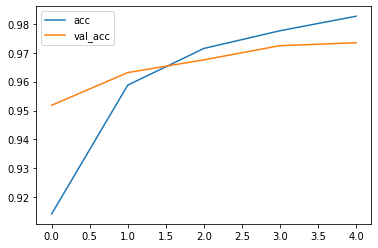

In [160]:
plt.plot(history.epoch, history.history.get('accuracy'),label='acc')
plt.plot(history.epoch, history.history.get('val_accuracy'), label='val_acc')
plt.legend()